<a href="https://colab.research.google.com/github/rahulgoel1106/LTAT.02.011-Network_Science/blob/main/lab04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


<h1><center> <font color='black'>  Network Science (LTAT.02.011) - Practice Session - 04  </font></center></h1>
<h2><center> <font color='black'> Network Centrality Measures</font></center></h3>
<h2><center> <font color='black'> University of Tartu - Spring 2021</font></center></h3>


================================================================================================================

# Already Covered:
1. **Get familiar with the graphs and how to work with them using igraph library; [Lab - 02]**
2. **Analyse the data about media companies. Figure out their connections; [Lab - 02]**
3. **Learn about various way of displaying statistic on the graphs; [Lab - 02]**
4. **Network models using Networkx library; [Lab - 03]**
+ **Specific graphs and graph models**
  1. Empty graph
  2. Complete graph/ Full graph
  3. Simple star graph
  4. Random tree
  5. Balanced tree
  6. Erdos-Renyi random graph model
  7. Watts–Strogatz small-world graph
  8. Barabási–Albert preferential attachment model
  9. Scale-free graph Vs Small-world graph
+ **Network and node descriptives**
  1. Density
  2. Reciprocity
  3. Transitivity
  4. Clustering coefficient
  5. Diameter
  6. Node degrees
  7. Degree distribution
  8. Paths
  9. Average path length
  10. Connected components
  11. Giant component
  12. k-cores

# Today's session agenda:
+ **Network Centrality Measures**
  1. Degree
  2. Closeness centrality
  3. Betweeness
  4. Eigenvector
  5. Katz
  6. Pagerank
  7. Hubs and Authorities
  8. Prestige

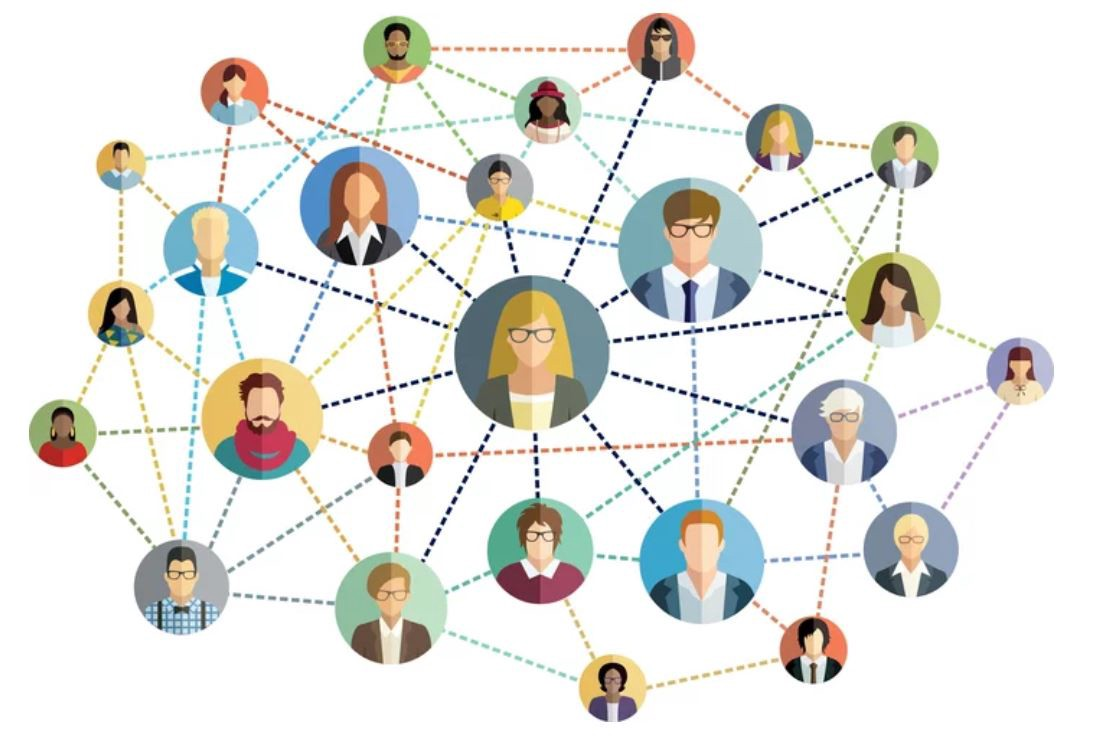

In [ ]:
from IPython.display import Image
#Image("SN.jpg") #https://medium.com/

# Libraries needed:

**We need following libraries: networkx**


In [ ]:
# Import libraries
import pandas as pd #For reading dataset files
import networkx as nx #For network creation/analysis
import matplotlib.pyplot as plt #For plotting graphs
%matplotlib inline

# Loading Datasets:

In [ ]:
#Read nodes and edges datasets
nodes = pd.read_csv('InputFileNodes.csv')
edges = pd.read_csv('InputFileEdges.csv')

In [ ]:
nodes.head()

,id,media,media.type,type.label,audience.size
0,s01,NY Times,1,Newspaper,20
1,s02,Washington Post,1,Newspaper,25
2,s03,Wall Street Journal,1,Newspaper,30
3,s04,USA Today,1,Newspaper,32
4,s05,LA Times,1,Newspaper,20


In [ ]:
edges.head()

,from,to,weight,type
0,s01,s02,10,hyperlink
1,s01,s02,12,hyperlink
2,s01,s03,22,hyperlink
3,s01,s04,21,hyperlink
4,s04,s11,22,mention


In [ ]:
#Collapse all edges of the same type between the same two nodes by summing their weights
edges = edges.groupby(['from', 'to', 'type'])['weight'].sum().reset_index()

In [ ]:
#Create graph using edgelist
G = nx.from_pandas_edgelist(edges, source='from', target='to',edge_attr=True)

In [ ]:
#network info
nx.info(G)

'Name: \nType: Graph\nNumber of nodes: 17\nNumber of edges: 38\nAverage degree:   4.4706'

In [ ]:
#Check nodes
G.nodes()

NodeView(('s01', 's02', 's03', 's04', 's15', 's09', 's10', 's05', 's08', 's11', 's12', 's06', 's17', 's16', 's07', 's14', 's13'))

In [ ]:
#Check edges
G.edges()

EdgeView([('s01', 's02'), ('s01', 's03'), ('s01', 's04'), ('s01', 's15'), ('s01', 's05'), ('s02', 's03'), ('s02', 's09'), ('s02', 's10'), ('s02', 's05'), ('s03', 's04'), ('s03', 's05'), ('s03', 's08'), ('s03', 's10'), ('s03', 's11'), ('s03', 's12'), ('s03', 's07'), ('s04', 's06'), ('s04', 's11'), ('s04', 's12'), ('s04', 's17'), ('s04', 's15'), ('s15', 's05'), ('s15', 's06'), ('s09', 's05'), ('s09', 's08'), ('s09', 's10'), ('s10', 's07'), ('s08', 's07'), ('s11', 's14'), ('s12', 's06'), ('s12', 's13'), ('s12', 's14'), ('s06', 's16'), ('s06', 's17'), ('s17', 's13'), ('s17', 's16'), ('s07', 's14'), ('s14', 's13')])

## Visualization
1. nx.draw
2. nx.draw_networkx

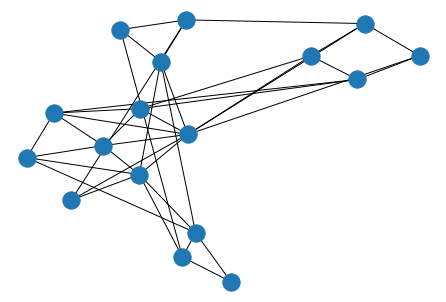

In [ ]:
nx.draw(G)

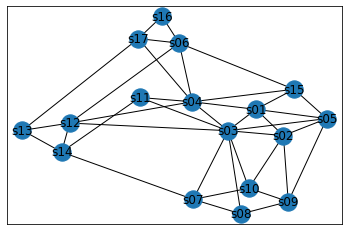

In [ ]:
nx.draw_networkx(G)

# 1. Network Centrality Measures

## 1.1. Degree centrality

The degree centrality of a node is simply its degree—the number of edges it has. The higher the degree, the more central the node is. This can be an effective measure, since many nodes with high degrees also have high centrality by other measures.

(array([1., 3., 6., 0., 5., 0., 0., 1., 0., 1.]),
 array([2. , 2.7, 3.4, 4.1, 4.8, 5.5, 6.2, 6.9, 7.6, 8.3, 9. ]),
 <a list of 10 Patch objects>)

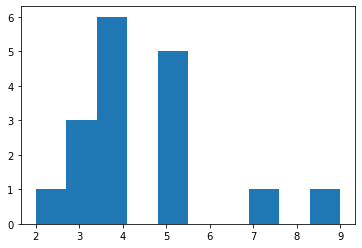

In [ ]:
#Degree plot
degrees = [G.degree(n) for n in G.nodes()]
plt.hist(degrees)

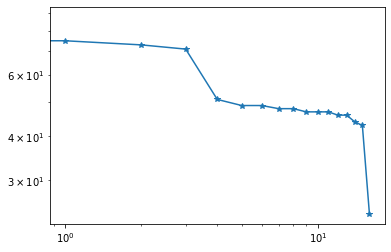

In [ ]:
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)
plt.loglog(degree_sequence,marker='*')
plt.show()

In [ ]:
#Degree centrality
degree_centrality = nx.degree_centrality(G)
degree_centrality

{'s01': 0.3125,
 's02': 0.3125,
 's03': 0.5625,
 's04': 0.4375,
 's05': 0.3125,
 's06': 0.3125,
 's07': 0.25,
 's08': 0.1875,
 's09': 0.25,
 's10': 0.25,
 's11': 0.1875,
 's12': 0.3125,
 's13': 0.1875,
 's14': 0.25,
 's15': 0.25,
 's16': 0.125,
 's17': 0.25}

In [ ]:
#Sort for identifying most inflential nodes using degree centrality
for node in sorted(degree_centrality, key=degree_centrality.get, reverse=True):
  print(node, degree_centrality[node])

s03 0.5625
s04 0.4375
s01 0.3125
s02 0.3125
s05 0.3125
s12 0.3125
s06 0.3125
s15 0.25
s09 0.25
s10 0.25
s17 0.25
s07 0.25
s14 0.25
s08 0.1875
s11 0.1875
s13 0.1875
s16 0.125


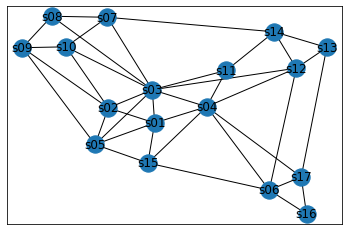

In [ ]:
#visualization
nx.draw_networkx(G)

## 1.2. Closeness centrality

In a connected graph, closeness centrality (or closeness) of a node is a measure of centrality in a network, calculated as the reciprocal of the sum of the length of the shortest paths between the node and all other nodes in the graph. Thus, the more central a node is, the closer it is to all other nodes.

In [ ]:
nx.closeness_centrality(G)

{'s01': 0.5333333333333333,
 's02': 0.48484848484848486,
 's03': 0.6666666666666666,
 's04': 0.6153846153846154,
 's05': 0.5161290322580645,
 's06': 0.5,
 's07': 0.48484848484848486,
 's08': 0.45714285714285713,
 's09': 0.41025641025641024,
 's10': 0.47058823529411764,
 's11': 0.5161290322580645,
 's12': 0.5714285714285714,
 's13': 0.43243243243243246,
 's14': 0.47058823529411764,
 's15': 0.48484848484848486,
 's16': 0.35555555555555557,
 's17': 0.45714285714285713}

In [ ]:
G_distance_dict = {(e1, e2): 1 / weight for e1, e2, weight in G.edges(data='weight')}
nx.set_edge_attributes(G, G_distance_dict, 'distance')

In [ ]:
nx.closeness_centrality(G, distance='distance')

{'s01': 4.328386707502425,
 's02': 4.1338964629333805,
 's03': 4.219460803657184,
 's04': 4.268401985373312,
 's05': 3.743172105864558,
 's06': 2.584800069326936,
 's07': 3.1851324515718087,
 's08': 2.8587570621468927,
 's09': 3.0231516056758774,
 's10': 3.411509751986516,
 's11': 3.611498779640711,
 's12': 2.7373369827725003,
 's13': 2.526803893884224,
 's14': 2.6153088850603003,
 's15': 3.938810544825238,
 's16': 2.399414033557587,
 's17': 2.5387155009832862}

## 1.3. Betweenness centrality

* Betweenness centrality quantifies the number of times a node acts as a bridge along the shortest path between two other nodes.

* Best connector/ Bridge

In [ ]:
nx.betweenness_centrality(G)

{'s01': 0.039146825396825395,
 's02': 0.025992063492063486,
 's03': 0.3404166666666666,
 's04': 0.19566468253968256,
 's05': 0.0654563492063492,
 's06': 0.10018849206349206,
 's07': 0.050277777777777775,
 's08': 0.019593253968253965,
 's09': 0.01736111111111111,
 's10': 0.025843253968253963,
 's11': 0.017916666666666664,
 's12': 0.12271825396825395,
 's13': 0.02111111111111111,
 's14': 0.04916666666666667,
 's15': 0.05621031746031746,
 's16': 0.0,
 's17': 0.05293650793650794}

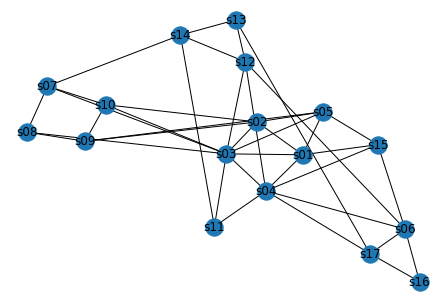

In [ ]:
nx.draw(G, with_labels=True)

## 1.4. Eigenvector centrality

If a node is pointed to by many nodes (which also have high eigenvector centrality) then that node will have high eigenvector centrality.

In [ ]:
nx.eigenvector_centrality(G)

{'s01': 0.3191408683729161,
 's02': 0.2910340882293079,
 's03': 0.4485472979675354,
 's04': 0.35283346117368636,
 's05': 0.2925525270528745,
 's06': 0.20688820586442147,
 's07': 0.19361886199342873,
 's08': 0.16462950341222413,
 's09': 0.19159229230644562,
 's10': 0.222095451699962,
 's11': 0.18692750129523714,
 's12': 0.24880953882933404,
 's13': 0.10650654463624042,
 's14': 0.14530038460965827,
 's15': 0.23130251528184964,
 's16': 0.06953859174549203,
 's17': 0.14528213666865797}

## 1.5. Katz centrality

* It is used to measure the relative degree of influence of an actor (or node) within a social network.
* It assigns free importance to every vertex

In [ ]:
nx.katz_centrality(G)

{'s01': 0.2661899362600269,
 's02': 0.2585214899019339,
 's03': 0.3478901119580387,
 's04': 0.30380429431829614,
 's05': 0.2586965664429264,
 's06': 0.2442980877842754,
 's07': 0.22594164043918727,
 's08': 0.20549255350345036,
 's09': 0.2213771859350646,
 's10': 0.231344693763054,
 's11': 0.21263834616088173,
 's12': 0.25655543343513715,
 's13': 0.19487287897431285,
 's14': 0.21497249250773132,
 's15': 0.2332705380212911,
 's16': 0.17214990077487383,
 's17': 0.21748417879464038}

## 1.6. PageRank centrality

* PageRank reflects the importance of a node in a network, and a higher PageRank value represents influential nodes who can spread their content to a community much faster compared to nodes with lower PageRank value.
* It divides the importance equally among out-neighbors


In [ ]:
nx.pagerank(G)

{'s01': 0.08510275171090054,
 's02': 0.07036723548249191,
 's03': 0.07210878220106509,
 's04': 0.07793068159840728,
 's05': 0.04910224124242257,
 's06': 0.060382118799456264,
 's07': 0.0558770073826599,
 's08': 0.05483671362647849,
 's09': 0.05556519842984653,
 's10': 0.05703894111148804,
 's11': 0.03013248098309863,
 's12': 0.0592909216542193,
 's13': 0.053256815369730585,
 's14': 0.05866910324143483,
 's15': 0.05086993441701705,
 's16': 0.05330205121583224,
 's17': 0.056167021533450726}

## 1.7. Hubs and Authorities

* Hubs mean nodes that outgoing edges. 
* Authorities are nodes that have incoming edges.

In [ ]:
nx.hits(G)

({'s01': 0.1774629988097624,
  's02': 0.14329569095043312,
  's03': 0.15600199340638543,
  's04': 0.1333902407639671,
  's05': 0.08191975377201248,
  's06': 0.01880427544132324,
  's07': 0.01822136773518352,
  's08': 0.01808694917338005,
  's09': 0.020512939558782573,
  's10': 0.028560499724564325,
  's11': 0.048075770182942096,
  's12': 0.0153468606677755,
  's13': 0.008504441521835267,
  's14': 0.009880181476737523,
  's15': 0.09044802715092935,
  's16': 0.012793663500394415,
  's17': 0.01869434616359142},
 {'s01': 0.17746299852436115,
  's02': 0.1432956910395289,
  's03': 0.15600199326510522,
  's04': 0.13339024082733314,
  's05': 0.0819197535864242,
  's06': 0.018804275482497128,
  's07': 0.01822136780403648,
  's08': 0.018086949166558765,
  's09': 0.020512939623127502,
  's10': 0.028560499692829044,
  's11': 0.0480757701005645,
  's12': 0.015346860726967572,
  's13': 0.00850444159429204,
  's14': 0.0098801815476187,
  's15': 0.09044802723994946,
  's16': 0.012793663570216338,
  's

## 1.8. Prestige: If a node receives high number of edges, it is considered as more prestige.

1. Degree Prestige: The number of incoming links to a node divided by the total possible number of incoming links.
2. Proximity Prestige: It is defined as distance or closeness of a node to other nodes.

## Exercise 1: Calculate Proximity Prestige for graph G.
[Help](https://youtu.be/CZp6Bxifvc8)